In [ ]:

analyzer_report_fn = "/home/michal/Development/github/pl-asr-bigos-tools/data/analyzer-reports/bigos-20240425.json"

# read json
import json
with open(analyzer_report_fn, "r") as f:
    analyzer_report = json.load(f)

print(analyzer_report)

In [ ]:
def get_num_of_samples_per_split(dataset_hf):
    # input - huggingface dataset object
    # output - dictionary with statistics about number of samples per split
    out_dict = {}
    # number of samples per subset and split
    metric = "samples_count"
    print("Calculating {}".format(metric))

    out_dict[metric] = {}
    for split in dataset_hf.keys():
        samples = dataset_hf[split].num_rows
        print(split, samples)
        out_dict[metric][split] = samples
    # add number of samples for all splits
    out_dict[metric]["all_splits"] = sum(out_dict[metric].values())

    return out_dict

def get_audio_duration_per_split(dataset_hf):
    # input - huggingface dataset object
    # output - dictionary with statistics about audio duration per split
    out_dict = {}
    metric = "audio_duration[h]"
    print("Calculating {}".format(metric))

    out_dict[metric] = {}
    for split in dataset_hf.keys():
        #sampling_rate = dataset_hf[split]["sampling_rate"][0]
        #audio_total_length_samples = 0
        #audio_total_length_samples = sum(len(audio_file["array"]) for audio_file in dataset_hf["test"]["audio"])
        audio_total_length_seconds = sum(len(audio_file["array"]) / audio_file["sampling_rate"] for audio_file in dataset_hf[split]["audio"])
        audio_total_length_hours = round(audio_total_length_seconds / 3600,2)
        out_dict[metric][split] = audio_total_length_hours
        print(split, audio_total_length_hours)
    # add number of samples for all splits
    out_dict[metric]["all_splits"] = sum(out_dict[metric].values())
    return out_dict

In [ ]:
def get_speakers_per_split(dataset_hf):
    # input - huggingface dataset object
    # output - dictionary with statistics about audio duration per split
    out_dict = {}
    metric = "speakers_count"
    print("Calculating {}".format(metric))

    out_dict[metric] = {}
    for split in dataset_hf.keys():
        # extract speakers from file_id 
        speakers_ids_all = [str(fileid).split("-")[4] for fileid in dataset_hf[split]["audioname"]]
        speakers_ids_uniq = list(set(speakers_ids_all))
        speakers_count = len(speakers_ids_uniq)
        print(split, speakers_count)
    # add number of samples for all splits
    out_dict[metric]["all_splits"] = sum(out_dict[metric].values())
    return out_dict

In [ ]:
def get_uniq_utts_per_split(dataset_hf):
    # input - huggingface dataset object
    # output - dictionary with statistics about audio duration per split
    out_dict = {}
    metric = "utterances_unique_count"
    print("Calculating {}".format(metric))

    out_dict[metric] = {}
    for split in dataset_hf.keys():
        # extract speakers from file_id 
        utts_all = dataset_hf[split]["ref_orig"]
        utts_uniq = list(set(utts_all))
        utts_uniq_count = len(utts_uniq)
        print(split, utts_uniq_count)
    # add number of samples for all splits
    out_dict[metric]["all_splits"] = "N/A"
    return out_dict

In [ ]:
def get_words_per_split(dataset_hf):
    # input - huggingface dataset object
    # output - dictionary with statistics about audio duration per split
    out_dict = {}
    metric = "words_count"
    print("Calculating {}".format(metric))

    out_dict[metric] = {}
    for split in dataset_hf.keys():
        # extract speakers from file_id 
        utts_all = dataset_hf[split]["ref_orig"]
        utts_lenghts = [len(utt.split(" ")) for utt in utts_all]
        words_all_count = sum(utts_lenghts)
        print(split, words_all_count)
    # add number of samples for all splits
    out_dict[metric]["all_splits"] = sum(out_dict[metric].values())
    return out_dict

In [ ]:
def get_unique_words_per_split(dataset_hf):
    # input - huggingface dataset object
    # output - dictionary with statistics about audio duration per split
    out_dict = {}
    out_words_list = []
    metric = "words_unique"
    print("Calculating {}".format(metric))

    out_dict[metric] = {}
    for split in dataset_hf.keys():
        # extract speakers from file_id 
        utts_all = dataset_hf[split]["ref_orig"]
        words_all = " ".join(utts_all).split(" ")
        words_uniq = list(set(words_all))
        out_words_list = out_words_list + words_uniq
        words_uniq_count = len(words_uniq)
        print(split, words_uniq_count)
    # add number of samples for all splits
    out_words_uniq = list(set((out_words_list)))
    out_words_uniq_count = len(out_words_uniq)
    out_dict[metric]["all_splits"] = out_words_uniq_count
    print("all", out_words_uniq_count)

    return out_dict, out_words_uniq

In [ ]:
def get_chars_per_split(dataset_hf):
    # input - huggingface dataset object
    # output - dictionary with statistics about audio duration per split
    out_dict = {}

    metric = "chars"
    print("Calculating {}".format(metric))

    out_dict[metric] = {}
    for split in dataset_hf.keys():
        # extract speakers from file_id 
        utts_all = dataset_hf[split]["ref_orig"]
        words_all = " ".join(utts_all).split(" ")
        chars_all = " ".join(words_all)
        chars_all_count = len(chars_all)
        print(split, chars_all_count)
    # add number of samples for all splits
    out_dict[metric]["all_splits"] = sum(out_dict[metric].values())
    return out_dict

In [ ]:
def get_unique_chars_per_split(dataset_hf):
    # input - huggingface dataset object
    # output - dictionary with statistics about audio duration per split
    out_dict = {}
    out_chars_list = []
    metric = "chars_unique"
    print("Calculating {}".format(metric))

    out_dict[metric] = {}
    for split in dataset_hf.keys():
        # extract speakers from file_id 
        utts_all = dataset_hf[split]["ref_orig"]
        words_all = " ".join(utts_all).split(" ")
        words_uniq = list(set(words_all))
        chars_uniq = list(set("".join(words_uniq)))
        chars_uniq_count = len(chars_uniq)
        print(split, chars_uniq_count)
        out_chars_list = out_chars_list + chars_uniq
    # add number of samples for all splits
    out_chars_uniq = list(set((out_chars_list)))
    out_chars_uniq_count = len(out_chars_uniq)
    out_dict[metric]["all_splits"] = out_chars_uniq_count
    print("all", out_chars_uniq_count)

    return out_dict, out_chars_uniq

In [ ]:
def get_meta_coverage_sex_per_split(dataset_hf):
    # input - huggingface dataset object
    # output - dictionary with statistics about audio duration per split
    out_dict = {}
    metric = "meta_coverage_sex"
    print("Calculating {}".format(metric))

    out_dict[metric] = {}
    for split in dataset_hf.keys():
        
        # extract speakers from file_id
        meta_info = dataset_hf[split]["speaker_sex"]

        # calculate coverage
        meta_info_count = len(meta_info)
        meta_info_not_null_count = len([x for x in meta_info if x != "N/A"])
        meta_info_coverage = round(meta_info_not_null_count / meta_info_count, 2)
        print(split, meta_info_coverage)

        # add number of samples for all splits
        out_dict[metric][split] = meta_info_coverage

    # add number of samples for all splits
    out_dict[metric]["all_splits"] = "N/A"
    return out_dict

In [ ]:
def get_meta_coverage_age_per_split(dataset_hf):
    # input - huggingface dataset object
    # output - dictionary with statistics about audio duration per split
    out_dict = {}
    metric = "meta_coverage_age"
    print("Calculating {}".format(metric))

    out_dict[metric] = {}
    for split in dataset_hf.keys():
        meta_info = dataset_hf[split]["speaker_age"]
     
        # calculate coverage
        meta_info_count = len(meta_info)
        meta_info_not_null_count = len([x for x in meta_info if x != "N/A"])
        meta_info_coverage = round(meta_info_not_null_count / meta_info_count, 2)
        print(split, meta_info_coverage)

        # add number of samples for all splits
        out_dict[metric][split] = meta_info_coverage

    # add number of samples for all splits
    out_dict[metric]["all_splits"] = "N/A"
    return out_dict

In [ ]:
def speech_rate_per_split(dataset_hf):
    # input - huggingface dataset object
    # output - dictionary with statistics about audio duration per split
    out_dict = {}
    metric = "speech_rate"
    print("Calculating {}".format(metric))

    out_dict[metric] = {}
    for split in dataset_hf.keys():
        # extract speakers from file_id 
        utts_all = dataset_hf[split]["ref_orig"]
        words_all = " ".join(utts_all).split(" ")
        words_all_count = len(words_all)
        audio_total_length_seconds = sum(len(audio_file["array"]) / audio_file["sampling_rate"] for audio_file in dataset_hf[split]["audio"])
        speech_rate = round(words_all_count / audio_total_length_seconds, 2)
        print(split, speech_rate)
        out_dict[metric][split] = speech_rate
    # add number of samples for all splits
    out_dict[metric]["all_splits"] = "N/A"
    return out_dict

In [ ]:

# distribution of speaker age
def get_speaker_age_distribution(dataset_hf):
    no_meta=False
    age_buckets = ['teens','twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties', 'nineties']
    # input - huggingface dataset object
    # output - dictionary with statistics about audio duration per split
    out_dict = {}
    metric = "speaker_age_distribution"
    print("Calculating {}".format(metric))

    out_dict[metric] = {}
    values_count_total = {}
    for age in age_buckets:
        values_count_total[age]=0
    for split in dataset_hf.keys():
        meta_info = dataset_hf[split]["speaker_age"]
        meta_info_not_null = [x for x in meta_info if x != "N/A"]
        out_dict[metric][split] = {}

        if len(meta_info_not_null) == 0:
            out_dict[metric][split][age]="N/A"
            no_meta=True
            continue
        for age in age_buckets:
            values_count = meta_info_not_null.count(age)
            values_count_total[age] += values_count
            out_dict[metric][split][age] = round(values_count/len(meta_info_not_null),2)
        print(split, out_dict[metric][split])
    
    # add number of samples for all splits
    if (no_meta):
        out_dict[metric]["all_splits"] = "N/A"
        return out_dict
    
    out_dict[metric]["all_splits"] = {}
    # calculate total number of samples in values_count_total
    for age in age_buckets:
        total_samples = sum(values_count_total.values())
        out_dict[metric]["all_splits"][age] = round(values_count_total[age]/total_samples,2)
    return out_dict


In [ ]:

# distribution of speaker age
def get_speaker_sex_distribution(dataset_hf):
    no_meta=False
    sex_types = ['male', 'female']

    # input - huggingface dataset object
    # output - dictionary with statistics about audio duration per split
    out_dict = {}
    metric = "speaker_sex_distribution"
    print("Calculating {}".format(metric))
    out_dict[metric] = {}
    values_count_total = {}
    for sex in sex_types:
        values_count_total[sex]=0
    for split in dataset_hf.keys():
        meta_info = dataset_hf[split]["speaker_sex"]
        meta_info_not_null = [x for x in meta_info if x != "N/A"]
        out_dict[metric][split] = {}

        if len(meta_info_not_null) == 0:
            out_dict[metric][split][sex]="N/A"
            no_meta=True
            continue
        for sex in sex_types:
            values_count = meta_info_not_null.count(sex)
            values_count_total[sex] += values_count
            out_dict[metric][split][sex] = round(values_count/len(meta_info_not_null),2)
        print(split, out_dict[metric][split])
    
    # add number of samples for all splits
    if (no_meta):
        out_dict[metric]["all_splits"] = "N/A"
        return out_dict
    
    out_dict[metric]["all_splits"] = {}
    # calculate total number of samples in values_count_total
    for sex in sex_types:
        total_samples = sum(values_count_total.values())
        out_dict[metric]["all_splits"][sex] = round(values_count_total[sex]/total_samples,2)
    return out_dict


In [ ]:
import numpy as np
recordings_per_speaker_stats_dict = {}
def recordings_per_speaker_stats(dataset_hf):
    # input - huggingface dataset object
    # output - dictionary with statistics about audio duration per split
    out_dict = {}
    metric = "recordings_per_speaker"
    print("Calculating {}".format(metric))
    
    recordings_per_speaker_stats_dict = {}

    out_dict[metric] = {}
    for split in dataset_hf.keys():
        # extract speakers from file_id 
        audiopaths = dataset_hf[split]["audioname"]
        speaker_prefixes = [str(fileid).split("-")[0:5] for fileid in audiopaths]

        # create dictionary with list of audio paths matching speaker prefix
        speakers_dict = {}
        # Create initial dictionary keys from speaker prefixes
        for speaker_prefix in speaker_prefixes:
            speaker_prefix_str = "-".join(speaker_prefix)
            speakers_dict[speaker_prefix_str] = []

        # Populate the dictionary with matching audio paths
        for audio_path in audiopaths:
            for speaker_prefix_str in speakers_dict.keys():
                if speaker_prefix_str in audio_path:
                    speakers_dict[speaker_prefix_str].append(audio_path)


        # todo calculate recordings_per_speaker_stats_dict
        # iterate of speaker_dict prefixes and calculate number of recordings per speaker.
        recordings_per_speaker_stats_dict = {}
        for speaker_prefix_str in speakers_dict.keys():
            recordings_per_speaker_stats_dict[speaker_prefix_str] = len(speakers_dict[speaker_prefix_str])
        out_dict[metric][split] = {}
        
        out_dict[metric][split]["recordings_per_speaker_list"] = recordings_per_speaker_stats_dict    
        
        # use recordings_per_speaker_stats to calculate statistics like min, max, avg, median, std
        out_dict[metric][split]["recordings_per_speaker_stats"] = {}
        speakers = len(list(recordings_per_speaker_stats_dict.keys()))
        recordings_total  = len(audiopaths)
        average_recordings_per_speaker = round( recordings_total / speakers,2)
        out_dict[metric][split]["recordings_per_speaker_stats"]["average"] = average_recordings_per_speaker
        out_dict[metric][split]["recordings_per_speaker_stats"]["std"] = round(np.std(list(recordings_per_speaker_stats_dict.values())),2)
        out_dict[metric][split]["recordings_per_speaker_stats"]["median"] = np.median(list(recordings_per_speaker_stats_dict.values()))

        out_dict[metric][split]["recordings_per_speaker_stats"]["min"] = min(recordings_per_speaker_stats_dict.values())
        out_dict[metric][split]["recordings_per_speaker_stats"]["max"] = max(recordings_per_speaker_stats_dict.values())

         # add number of samples for all splits
    out_dict[metric]["all_splits"] = "N/A"
    return out_dict

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset
import os

def distribution_audio_duration(dataset_hf, output_dir, metric = "audio_duration_seconds",  dimension = "speaker_sex"):
    # input - huggingface dataset object
    # output - figure with distribution of audio duration per sex
    out_dict = {}

    print("Calculating {}".format(metric))
    out_dict[metric] = {}
    # drop samples for which dimension column values are equal to "N/A"
    for split in dataset_hf.keys():
        df_dataset = pd.DataFrame(dataset_hf[split])
        df_dataset = df_dataset.drop(columns=["audio"])
        
        # remove values equal to "N/A" for column dimension
        df_filtered = df_dataset[df_dataset[dimension] != "N/A"]  
        df_filtered = df_filtered[df_filtered[dimension] != "other"]
        # if df_filtered is empty, skip violin plot generation for this split and dimension
        if df_filtered.empty:
            print("No data for split {} and dimension {}".format(split, dimension))
            continue
        plt.figure(figsize=(15, 10))
        sns.violinplot(data = df_filtered, hue=dimension, x='dataset', y=metric, split=True, fill = False, inner="box", legend='auto', common_norm=True)
        plt.title('Violin plot of {} by {} for split {}'.format(metric, dimension, split))
        plt.xlabel(dimension)
        plt.ylabel(metric)
        plt.show()
        # save figure to file
        os.makedirs(output_dir, exist_ok=True)
        output_fn = os.path.join(output_dir, metric + "-" + dimension + "-" + split + ".png") 
        plt.savefig(output_fn)


In [ ]:
import os
from datasets import load_dataset
from datasets import get_dataset_config_names
dataset_name = "amu-cai/pl-asr-bigos-v2"
# get dataset config names
dataset_config_names = get_dataset_config_names(dataset_name)
# load dataset
dataset_hf = load_dataset(dataset_name, "all")

dataset_statistics={}
dataset_contents = {}
output_dir_plots = "./plots"
os.makedirs(output_dir_plots, exist_ok=True)
output_dir_reports = "./reports"
os.makedirs(output_dir_plots, exist_ok=True)

for config_name in dataset_config_names         :
    print(config_name)
    dataset_hf_subset = load_dataset(dataset_name, config_name)        
    #dataset_statistics[config_name] = get_num_of_samples_per_split(dataset_hf_subset)
    #dataset_statistics[config_name] = get_uniq_utts_per_split(dataset_hf_subset)
    #dataset_statistics[config_name] = get_words_per_split(dataset_hf_subset)
    
    #dataset_contents[config_name] = {}

    #dataset_statistics[config_name], dataset_contents[config_name]["unique_words"] = get_unique_words_per_split(dataset_hf_subset)

    #dataset_statistics[config_name] = get_chars_per_split(dataset_hf_subset)
    #dataset_statistics[config_name], dataset_contents[config_name]["unique_chars"] = get_unique_chars_per_split(dataset_hf_subset)

    #dataset_statistics[config_name] = get_audio_duration_per_split(dataset_hf_subset)
    #dataset_statistics[config_name] = get_speakers_per_split(dataset_hf_subset)

    #dataset_statistics[config_name] = get_meta_coverage_sex_per_split(dataset_hf_subset)
    #dataset_statistics[config_name] = get_meta_coverage_age_per_split(dataset_hf_subset)
    # metadata coverage per subset in percent - speaker accent

    # speech rate per subset
    #dataset_statistics[config_name] = speech_rate_per_split(dataset_hf_subset)
    #dataset_statistics[config_name] = get_speaker_age_distribution(dataset_hf_subset)
    #dataset_statistics[config_name] = get_speaker_sex_distribution(dataset_hf_subset)
    #print(dataset_statistics[config_name])
    
    dataset_statistics[config_name] = recordings_per_speaker_stats(dataset_hf_subset)
    #dataset_statistics[config_name] = uniq_utterances_per_speaker_stats(dataset_hf_subset)
    # number of words per speaker (min, max, med, avg, std)


    # distribution
    # distribution of audio duration per subset
    output_dir_plots_subset = os.path.join(output_dir_plots, config_name)
    dataset_statistics[config_name] = distribution_audio_duration(dataset_hf_subset, output_dir_plots_subset, 'audio_duration_seconds', 'speaker_sex')
    
    # distribution of audio duration per age
    dataset_statistics[config_name] = distribution_audio_duration(dataset_hf_subset, output_dir_plots_subset, 'audio_duration_seconds', 'speaker_age')

    
    # distribution of speaking rate per subset


/home/michal/.pyenv/versions/3.10.11/envs/streamlit/lib/python3.10/site-packages/datasets/load.py:1486: FutureWarning: The repository for amu-cai/pl-asr-bigos-v2 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/amu-cai/pl-asr-bigos-v2
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Dataset({
    features: ['audioname', 'split', 'dataset', 'speaker_id', 'ref_orig', 'audio', 'audio_duration_samples', 'audio_duration_seconds', 'samplingrate_orig', 'sampling_rate', 'audiopath_bigos', 'audiopath_local', 'speaker_age', 'speaker_sex'],
    num_rows: 44
})


In [2]:
import json
import pandas as pd

#dataset_public = "amu-cai/pl-asr-bigos-v2"
#dataset_secret = "amu-cai/pl-asr-bigos-v2-secret"

dataset_public = "pelcra/pl-asr-pelcra-for-bigos"
dataset_secret = "pelcra/pl-asr-pelcra-for-bigos-secret"

json_contents_public = "./reports/{}/dataset_contents.json".format(dataset_public)
json_stats_public = "reports/{}/dataset_statistics.json".format(dataset_public)

json_contents_secret = "./reports/{}/dataset_contents.json".format(dataset_secret)
json_stats_secret = "reports/{}/dataset_statistics.json".format(dataset_secret)

with open(json_contents_secret, 'r') as file:
    contents_dict_secret = json.load(file)

with open(json_stats_secret, 'r') as file:
    stats_dict_secret = json.load(file)

with open(json_contents_public, 'r') as file:
    contents_dict_public = json.load(file)

with open(json_stats_public, 'r') as file:
    stats_dict_public = json.load(file)



FileNotFoundError: [Errno 2] No such file or directory: './reports/pelcra/pl-asr-pelcra-for-bigos/dataset_contents.json'

In [116]:
# merge contents if dictionaries for fields utts, words, words_unique, chars, chars_unique and speech_rate
for dataset in stats_dict_public.keys():
    print(dataset)
    for metric in stats_dict_secret[dataset].keys():
        for split in stats_dict_secret[dataset][metric].keys():
            if split == "test":
                stats_dict_public[dataset][metric][split] = stats_dict_secret[dataset][metric][split]
        



ul-diabiz_poleval-22
ul-spokes_mix_emo-18
ul-spokes_mix_luz-18
ul-spokes_mix_parl-18
ul-spokes_biz_bio-23
ul-spokes_biz_int-23
ul-spokes_biz_luz-23
ul-spokes_biz_pod-23
ul-spokes_biz_pres-23
ul-spokes_biz_vc-23
ul-spokes_biz_vc2-23
ul-spokes_biz_wyw-23
all


In [120]:
# Creating a MultiIndex DataFrame
rows = []
for dataset, metrics in stats_dict_public.items():
    if (dataset == "all"):
        continue
    for metric, splits in metrics.items():
        for split, value in splits.items():
            if (split == "all_splits"):
                continue
            rows.append((dataset, metric, split, value))

# Convert to DataFrame
df = pd.DataFrame(rows, columns=['dataset', 'metric', 'split', 'value'])
df.set_index(['dataset', 'metric', 'split'], inplace=True)

print(df.loc['ul-diabiz_poleval-22'])

                                                                        value
metric          split                                                        
samples         test                                                      947
                train                                                    7719
                validation                                                284
utts_unique     test                                                      944
                train                                                    7556
                validation                                                280
words           test                                                    12051
                train                                                   89255
                validation                                               3900
words_unique    test                                                     2772
                train                                           

In [121]:
# Get the total number of speakers, samples, unique utts, words, unique words, chars, unique chars and speech rate
metrics = ["samples", "utts_unique", "words", "words_unique", "chars", "audio[h]", "speakers"]
           # unique utts, words, unique words, chars, unique chars and speech rate
# filter the multiindex dataframe to leave only specific metrics
df_total = df.loc[(slice(None), metrics), :]
df_total = df_total.unstack(level ='split')
df_total['value', 'total'] = df_total['value'].sum(axis=1)
df_total.columns = df_total.columns.droplevel(0)
columns_to_drop = ['test', 'train', 'validation']
df_total.drop(columns = columns_to_drop, inplace = True)
df_total = df_total.unstack(level ='metric')
df_total.columns = df_total.columns.droplevel(0)
df_total

metric                samples utts_unique    words words_unique    chars  \
dataset                                                                    
ul-diabiz_poleval-22     8950        8780   105206        16322   585481   
ul-spokes_biz_bio-23    54917       54136  1278269       137520  7694395   
ul-spokes_biz_int-23     1109        1101    23123         6665   141643   
ul-spokes_biz_luz-23    41966       41641   786593       108535  4490695   
ul-spokes_biz_pod-23    22807       22762   605852        83807  3650700   
ul-spokes_biz_pres-23   17174       17158   251841        54253  1642817   
ul-spokes_biz_vc-23     45272       44710   568780        77754  3348648   
ul-spokes_biz_vc2-23    25802       25596   755885        99850  4526688   
ul-spokes_biz_wyw-23    11357       11204   259517        45114  1552980   
ul-spokes_mix_emo-18    24329       21063   252380        19819  1379695   
ul-spokes_mix_luz-18    20919       19668   204587        26106  1132428   
ul-spokes_mix_parl-18    8656        8521   100992        18681   669210   

metric                audio[h] speakers  
dataset                                  
ul-diabiz_poleval-22     19.68      170  
ul-spokes_biz_bio-23    275.96      158  
ul-spokes_biz_int-23      4.51        9  
ul-spokes_biz_luz-23    148.55      158  
ul-spokes_biz_pod-23     110.0      113  
ul-spokes_biz_pres-23    64.49       55  
ul-spokes_biz_vc-23     104.13       78  
ul-spokes_biz_vc2-23    162.08       84  
ul-spokes_biz_wyw-23     56.41       38  
ul-spokes_mix_emo-18     51.23       40  
ul-spokes_mix_luz-18     37.48       21  
ul-spokes_mix_parl-18    24.55       48

In [78]:
# Access all data where Metric is 'utts'
df_utts = df.xs('samples', level='metric')

# change split to columns
df_utts = df_utts.unstack(level='split')
df_utts

# add column with total number of samples
df_utts['value', 'total'] = df_utts['value'].sum(axis=1)
df_utts

# create a new row with total number of samples and concatenate it to the DataFrame
df_total = df_utts.sum()
df_total.name = ('Total')
df_utts = pd.concat([df_utts, pd.DataFrame(df_total).T])
df_utts



value                         
split                        test  train validation  total
fair-mls-20                   519  25042        511  26072
google-fleurs-22              758   2841        338   3937
mailabs-corpus_librivox-19   1501  11834       1527  14862
mozilla-common_voice_15-23   8896  19119       8895  36910
pjatk-clarin_mobile-15        392   2861        242   3495
pjatk-clarin_studio-15       1404     44         40   1488
polyai-minds14-21              53    462         47    562
pwr-azon_read-20              586   1820        382   2788
pwr-azon_spont-20              48    357         51    456
pwr-maleset-unk               477   3783        478   4738
pwr-shortwords-unk             92    761         86    939
pwr-viu-unk                   267   2146        290   2703
Total                       14993  71070      12887  98950

In [27]:

# Access all 'train' splits across all metrics
print(df.xs('train', level='split'))

# xs is the best for single level indexing. It can be chained, but is less effective than loc or boolean masking

                                                                                    value
dataset                metric                                                            
pjatk-clarin_mobile-15 samples                                                       2861
                       utts                                                          2857
                       words                                                        74634
                       words_unique                                                 23166
                       chars                                                       507238
...                                                                                   ...
all                    meta_cov_sex                                                  0.57
                       meta_cov_age                                                  0.24
                       meta_dist_sex                       {'male': 0.64, 'female': 0.36}
          

In [45]:
# Boolean masking for a more complex condition across levels
mask_test_set = (df.index.get_level_values('metric') == 'samples') & (df.index.get_level_values('split') == 'test') 
df_test = df.loc[mask_test_set]
# convert value to numbric
# sort by value
df_test = df_test.sort_values(by='value', ascending=False)
# filter out values smaller than 100
df_test = df_test[df_test['value'] > 100]

# remove dataset "all"
df_test = df_test.drop('all', level='dataset')
print(df_test)


                                         value
dataset                    metric  split      
mozilla-common_voice_15-23 samples test   8896
mailabs-corpus_librivox-19 samples test   1501
pjatk-clarin_studio-15     samples test   1404
google-fleurs-22           samples test    758
pwr-azon_read-20           samples test    586
fair-mls-20                samples test    519
pwr-maleset-unk            samples test    477
pjatk-clarin_mobile-15     samples test    392
pwr-viu-unk                samples test    267


In [60]:
# What is the total distribution of age in common voice dataset and overall?
df_age = df.xs('meta_dist_age', level='metric')
df_age = df_age.unstack(level='split')
#df_age['value', 'total'] = df_age['value'].sum(axis=1)
df_age

value  \
split                                                                    test   
dataset                                                                         
fair-mls-20                                                               N/A   
google-fleurs-22                                                          N/A   
mailabs-corpus_librivox-19                                                N/A   
mozilla-common_voice_15-23  {'teens': 0.11, 'twenties': 0.38, 'thirties': ...   
pjatk-clarin_mobile-15                                                    N/A   
pjatk-clarin_studio-15                                                    N/A   
polyai-minds14-21                                                         N/A   
pwr-azon_read-20                                                          N/A   
pwr-azon_spont-20                                                         N/A   
pwr-maleset-unk                                                           N/A   
pwr-shortwords-unk                                                        N/A   
pwr-viu-unk                                                               N/A   

                                                                               \
split                                                                   train   
dataset                                                                         
fair-mls-20                                                               N/A   
google-fleurs-22                                                          N/A   
mailabs-corpus_librivox-19                                                N/A   
mozilla-common_voice_15-23  {'teens': 0.03, 'twenties': 0.43, 'thirties': ...   
pjatk-clarin_mobile-15                                                    N/A   
pjatk-clarin_studio-15                                                    N/A   
polyai-minds14-21                                                         N/A   
pwr-azon_read-20                                                          N/A   
pwr-azon_spont-20                                                         N/A   
pwr-maleset-unk                                                           N/A   
pwr-shortwords-unk                                                        N/A   
pwr-viu-unk                                                               N/A   

                                                                               
split                                                              validation  
dataset                                                                        
fair-mls-20                                                               N/A  
google-fleurs-22                                                          N/A  
mailabs-corpus_librivox-19                                                N/A  
mozilla-common_voice_15-23  {'teens': 0.15, 'twenties': 0.46, 'thirties': ...  
pjatk-clarin_mobile-15                                                    N/A  
pjatk-clarin_studio-15                                                    N/A  
polyai-minds14-21                                                         N/A  
pwr-azon_read-20                                                          N/A  
pwr-azon_spont-20                                                         N/A  
pwr-maleset-unk                                                           N/A  
pwr-shortwords-unk                                                        N/A  
pwr-viu-unk                                                               N/A

In [13]:
from datasets import load_dataset 
pelcra = load_dataset("pelcra/pl-asr-pelcra-for-bigos", "all", split="test")
df_test = pelcra.to_pandas()
df_test = df_test.drop(columns=["audio"])
df_test.to_csv("test.tsv", sep="\t",index=False)

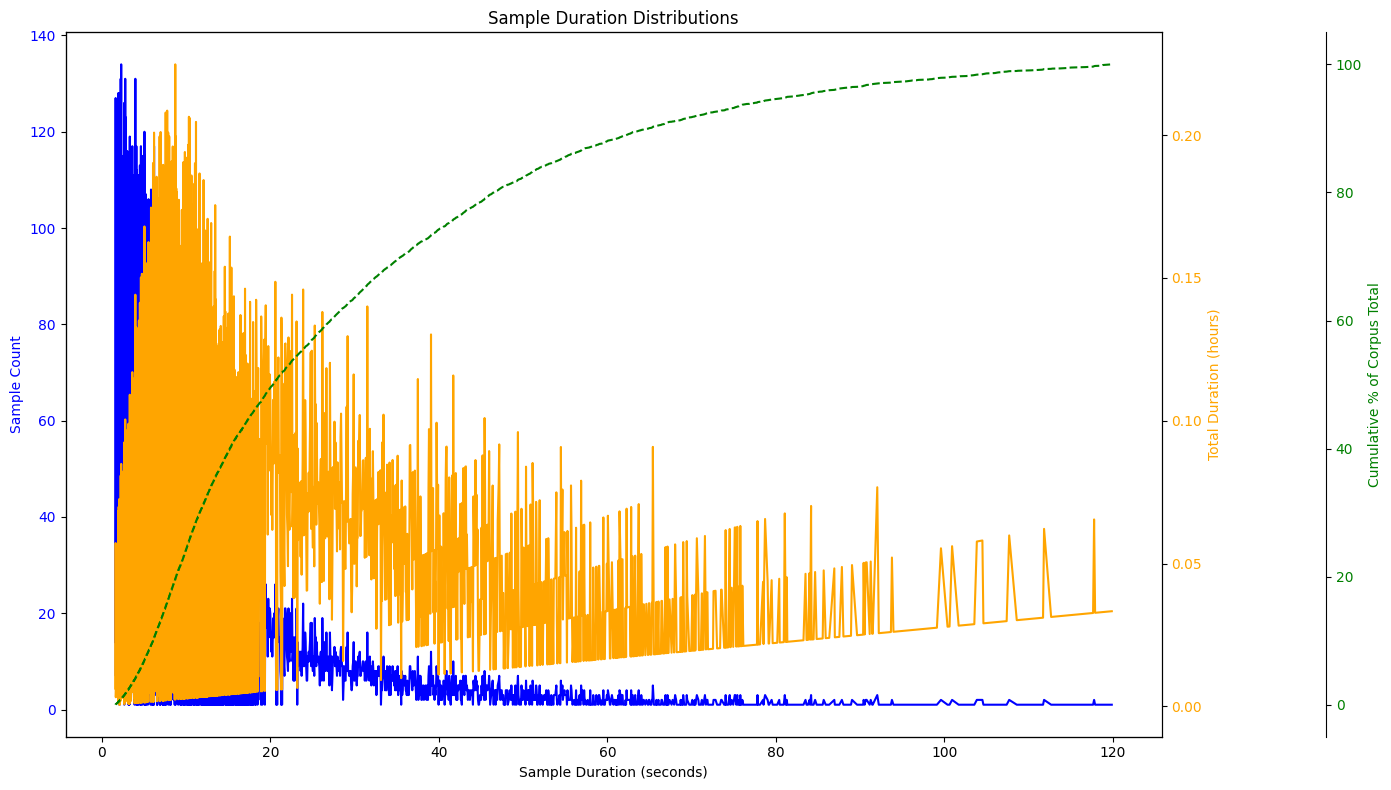

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data from the TSV file into a DataFrame
#file_path = '/mnt/data/test.tsv'
#data = pd.read_csv(file_path, sep='\t')
data = df_test
# Group the data by audio duration and calculate the count and total duration for each group
duration_group = data.groupby('audio_duration_seconds').agg(
    sample_count=('audio_duration_seconds', 'size'),
    total_duration=('audio_duration_seconds', 'sum')
).reset_index()

# eliminate outliers - samples with duration longer than 150 seconds
duration_group = duration_group[duration_group['audio_duration_seconds'] < 120]

# Calculate the cumulative percentage of the total duration
duration_group['cumulative_duration'] = (duration_group['total_duration'].cumsum() / 
                                        duration_group['total_duration'].sum()) * 100

# Plotting the data
fig, ax1 = plt.subplots(figsize=(14, 8))

# Left axis - Count of samples (blue line)
ax1.set_xlabel('Sample Duration (seconds)')
ax1.set_ylabel('Sample Count', color='blue')
ax1.plot(duration_group['audio_duration_seconds'], duration_group['sample_count'], color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Right axis - Total duration (orange line)
ax2 = ax1.twinx()
ax2.set_ylabel('Total Duration (hours)', color='orange')
ax2.plot(duration_group['audio_duration_seconds'], duration_group['total_duration'] / 3600, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Adding Cumulative % (green dashed line)
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.15))
ax3.set_ylabel('Cumulative % of Corpus Total', color='green')
ax3.plot(duration_group['audio_duration_seconds'], duration_group['cumulative_duration'], color='green', linestyle='--')
ax3.tick_params(axis='y', labelcolor='green')

# Title and legend
plt.title('Sample Duration Distributions')
fig.tight_layout()  # Adjust the layout to make room for the third y-axis

# Show plot
plt.show()


In [2]:
import os
from datasets import load_dataset
from datasets import get_dataset_config_names
dataset_name = "amu-cai/pl-asr-bigos-v2"
# get dataset config names
dataset_config_names = get_dataset_config_names(dataset_name)
# load dataset
dataset_hf = load_dataset(dataset_name, "pjatk-clarin_mobile-15")

print(dataset_hf)

/home/michal/.pyenv/versions/3.10.11/envs/streamlit/lib/python3.10/site-packages/datasets/load.py:1486: FutureWarning: The repository for amu-cai/pl-asr-bigos-v2 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/amu-cai/pl-asr-bigos-v2
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(
Generating test split: 22 examples [00:00, 206.09 examples/s]

Generating  examples


Generating test split: 392 examples [00:01, 310.58 examples/s]
Generating train split: 36 examples [00:00, 335.23 examples/s]

Generating  examples


Generating train split: 2861 examples [00:08, 321.16 examples/s]
Generating validation split: 34 examples [00:00, 330.58 examples/s]

Generating  examples


Generating validation split: 242 examples [00:00, 317.93 examples/s]


DatasetDict({
    test: Dataset({
        features: ['audioname', 'split', 'dataset', 'speaker_id', 'ref_orig', 'audio', 'audio_duration_samples', 'audio_duration_seconds', 'samplingrate_orig', 'sampling_rate', 'audiopath_bigos', 'audiopath_local', 'speaker_age', 'speaker_sex'],
        num_rows: 392
    })
    train: Dataset({
        features: ['audioname', 'split', 'dataset', 'speaker_id', 'ref_orig', 'audio', 'audio_duration_samples', 'audio_duration_seconds', 'samplingrate_orig', 'sampling_rate', 'audiopath_bigos', 'audiopath_local', 'speaker_age', 'speaker_sex'],
        num_rows: 2861
    })
    validation: Dataset({
        features: ['audioname', 'split', 'dataset', 'speaker_id', 'ref_orig', 'audio', 'audio_duration_samples', 'audio_duration_seconds', 'samplingrate_orig', 'sampling_rate', 'audiopath_bigos', 'audiopath_local', 'speaker_age', 'speaker_sex'],
        num_rows: 242
    })
})
